In [1]:
import numpy as np
import matplotlib.pyplot as plt
from regions import Regions
import regions
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u

from smart_plotters.jwst_plots import JWSTCatalog, make_cat_use, make_brick_cat
from smart_plotters.cutout_plot import get_cutout_405, get_cutout_jwst_ice
from smart_plotters import cmd_plot

#import importlib as imp

#imp.reload(cmd_plot)

In [ ]:
cat_use = make_cat_use()


In [ ]:
cat_deepice = JWSTCatalog(cat_use.catalog[(cat_use.color('f405n', 'f466n') < -0.3) & (cat_use.catalog['emag_ab_f405n'] < 0.05) & (cat_use.catalog['emag_ab_f466n'] < 0.05)])

In [ ]:
fn = '/orange/adamginsburg/jwst/cloudc/images/jw02221-o002_t001_nircam_clear-f405n-merged_i2d.fits'
hdu = fits.open(fn)
ww = WCS(hdu['SCI'].header)
nanfield = np.nan * hdu['SCI'].data

<Axes: xlabel='[F182M] - [F212N]', ylabel='[F405N] - [F466N]'>

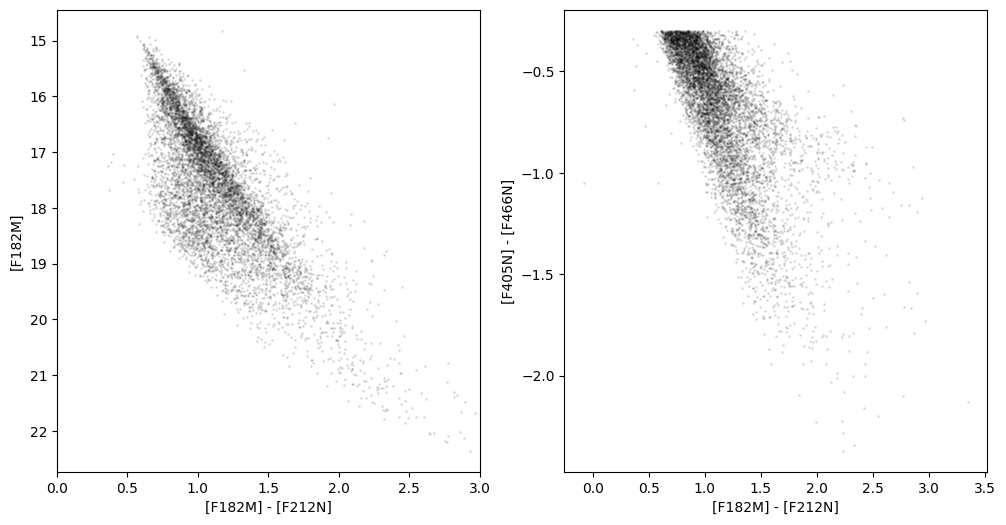

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(121)
cat_deepice.plot_CMD('f182m', 'f212n', 'f182m', s=1, alpha=0.1, color='k', ax=ax)
ax.set_xlim(0, 3)

ax2 = plt.subplot(122)
cat_deepice.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', s=1, alpha=0.1, color='k', ax=ax2)

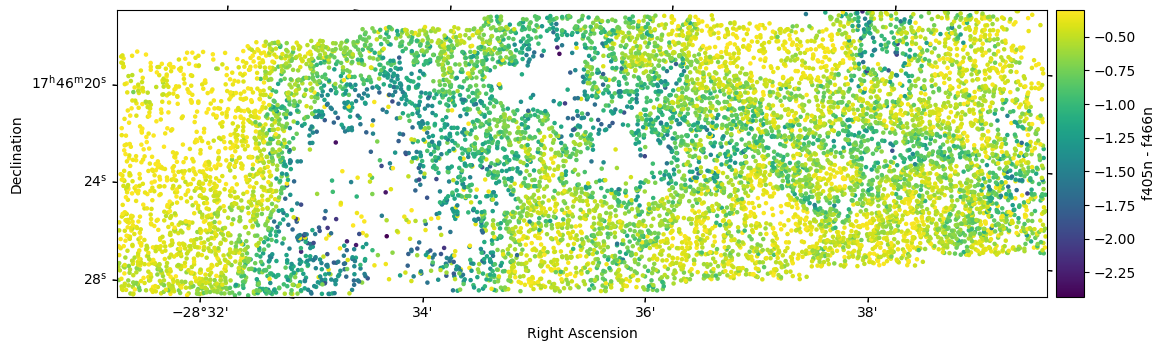

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = plt.subplot(projection=ww)
ax.imshow(nanfield)
cat_deepice.plot_position(s=5, c=cat_deepice.color('f405n', 'f466n'), cmap='viridis', transform=ax.get_transform('world'))
cax = ax.inset_axes([1.01, 0., 0.03, 1])
plt.colorbar(ax.collections[0], cax=cax, orientation='vertical', label='f405n - f466n')